### 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

<img src="images/sklearn3.png" width="800">

### 붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 feature을 기반으로 폼의 품종을 예측하기 위한 것이다. 

- 지도학습 중 분류

- 독립변수(x): 꽃잎의 길이, 너비, 꽃받침의 길이, 너비

- 종속변수(y): 품종( Setosa, Vesicolor, Virginica)

 

붓꽃 데이터 분류 예측 프로세스는 아래와 같이 이루어 질 수 있다. 

1. 데이터 세트 분리: 데이터를 training data와 test data로 분리

2. 모델 학습: training data를 기반을로 ML 알골리즘을 적용하여 모델을 학습

3. 예측 수행: 학습된 ML 모델을 이용해 test data의 분류를 예측

4. 평가: 이렇게 예측된 결과값과 test data의 실제 결괏값을 비교해 ML 모델 성능을 평가

### 사이킷런이 제공하는 데이터셋 - sklearn.utils.Bunch 객체로서 딕셔너리와 비슷
- data : 피처의 데이터 세트
- target : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트
- target_names : 개별 레이블의 이름
- feature_names : 피처의  이름
- DESCR : 데이터 세트에 대한 설명과 각 피처의 설명

In [2]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다. 
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다. 
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. 
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=11)

In [ ]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 
dt_clf.fit(X_train, y_train)

In [ ]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행. 
y_hat = dt_clf.predict(X_test)

In [ ]:
y_hat

In [ ]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,y_hat)))

# Scikit-learn

<img src="images/skl.jpg" width="200">

## Python 프로그래밍 언어를위한 무료 소프트웨어 기계 학습 라이브러리
### 사이킷런은 API 일관성과 개발 편의성을 제공하기 위한 노력이 엿보이는 패키지임

<img src="images/sklearn1.png" width="800">

<img src="images/sklearn2.png" width="1000">

# 성능 평가 지표
- 분류의 성능 평가 지표: 정확도(Accuracy), 오차 행렬(Confusion Matrix), 정밀도(Precision), 재현율(Recall), F1 score, ROC AUC 

- 회귀의 성능 평가 지표: 대부분 실제 값과 예측값의 오차 평균값에 기반한 평가, 결정계수(R-제곱)

## <span style="color:red">정확도(Accuracy)</span>
### 정확도 = (예측 결과가 동일한 데이터 건수) / (전체 예측 데이터 건수)
### 정확도는 실제 데이터에 예측 데이터가 얼마나 같은지를 판단하는 지표이다. 

#### 정확도라는 것이 모델의 예측 성능을 나타내는 매우 직관적인 평가 지표이긴 하지만 이진분류 인 경우 정확도로만 평가하기엔 무리가 있다. 
#### 왜냐하면 데이터의 구성에 따라 모델의 성능이 왜곡되게 평가될 수도 있기 때문이다. 
#### 정확도만 사용하기보다 여러 분류 성능 지표와 함께 사용하는게 좋다. 

## <span style="color:red">오차 행렬(Confusion Matrix)</span>
### 오차 행렬은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표이다. 

<img src="images/sklearn4.jpg" width="600">

#### 행렬의 각 칸에 적힌 TP, FP, FN, TN 중 뒤 글자인 P, N은 '예측을 이렇게 했다'라는 의미이다. 
#### 앞 글자인 T, F는  '그 예측 결과가 실제 값과 일치하거나(T), 다름(F)을 의미한다.

## <span style="color:red">정밀도(Precision)와 재현율(Recall; Sensitivity; TPR)</span>

### 정밀도 = TP / (TP + FP)
#### 정밀도는 예측 값을 Positive로 한 것 중에 예측 값과 실제 값이 positive로 일치한 데이터의 비율을 의미한다. 
### 재현율 = TP / (FN + TP)
#### 재현율은 실제 값이 Positive인 것 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 의미한다. 

#### 정밀도를 높이려면? TP도 높여야하지만, 분모도 작아져야 한다. 그러니까 FP를 낮추는 데 중점을 두게 된다.
#### 재현율을 높이려면? TP도 높여야하지만, 분모도 작아져야 한다. 그러니까 FN를 낮추는 데 중점을 두게 된다. 

### 정밀도와 재현율은 서로 보완적인 분류 성능 지표이며 가장 좋은 모델은 재현율과 정밀도의 수치가 둘다 높은 것이다.
---> 정밀도와 재현율의 수치가 적절하게 조합된 종합 성능 평가 지표가 필요하다. 

## F1 score
### 정밀도와 재현율을 결합한 지표로, 정밀도와 재현율이 어느 한 쪽으로 치우치지 않을 때 상대적으로 높은 값을 가진다. 

## <span style="color:red">ROC 곡선과 AUC</span>
### ROC 곡선과 이에 기반한 AUC 는 의학 분야나 이진 분류 모델의 성능 평가 지표로 중요하게 사용된다. 

#### ROC 곡선은 FPR의 변화에 따른 TRP의 변화를 나타내는 곡선이다. 
※ FPR (False Positive Rate): FPR = FP / (FP+TN) 으로, 실제 Negative 를 잘못 예측한 비율을 나타낸다. <br>
※ TPR (True Positive Rate): TPR = TP / (FN+TP)으로, 재현율과 같이 실제 Positive인 것 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 의미한다. 

# 상관분석

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic = sns.load_dataset("titanic")
titanic=titanic.iloc[:,0:7]
display(titanic.tail())

,survived,pclass,sex,age,sibsp,parch,fare
886,0,2,male,27.0,0,0,13.00
887,1,1,female,19.0,0,0,30.00
888,0,3,female,NaN,1,2,23.45
889,1,1,male,26.0,0,0,30.00
890,0,3,male,32.0,0,0,7.75


In [5]:
titanic.dropna(axis=0, inplace=True)

In [6]:
titanic.corr(method='pearson')

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


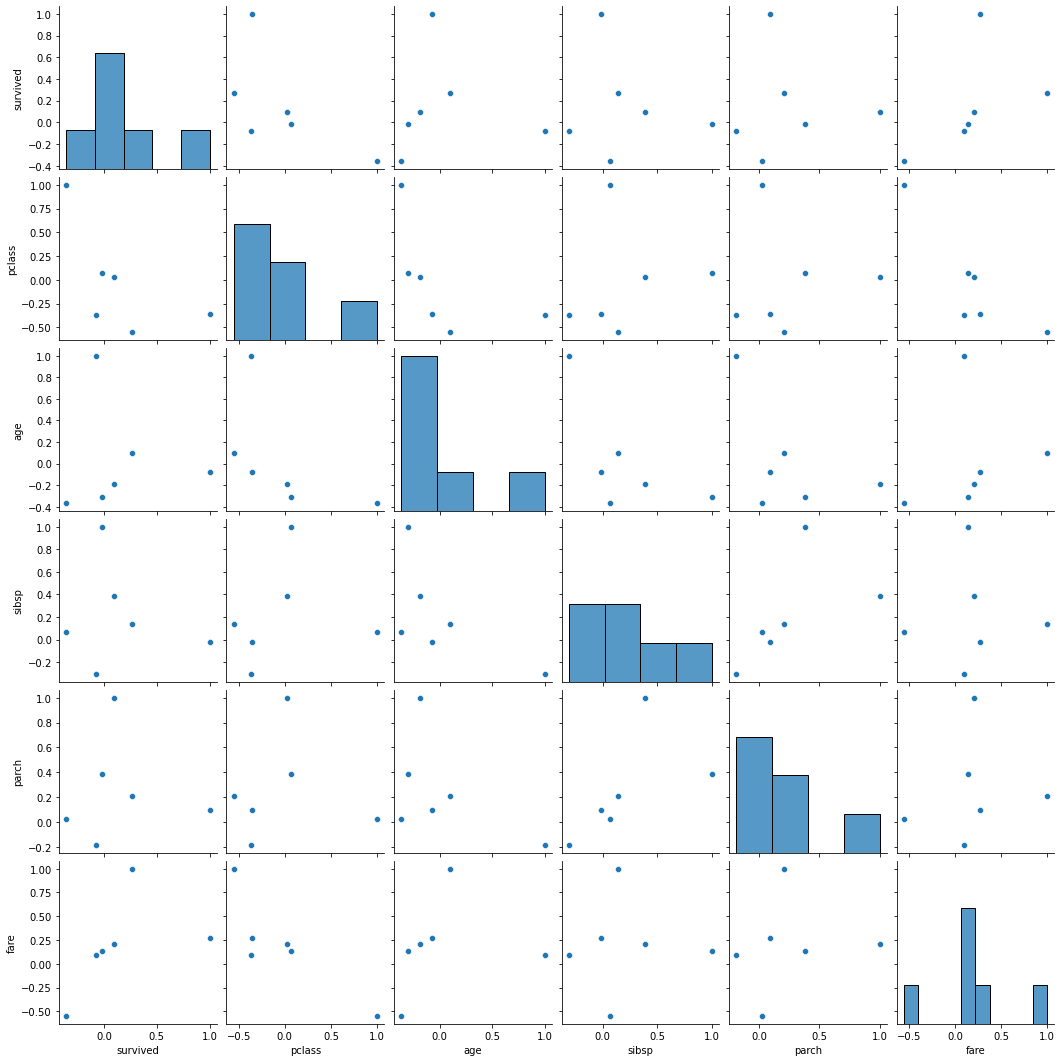

In [7]:
result = titanic.corr(method='pearson')
sns.pairplot(data=result)
plt.show()

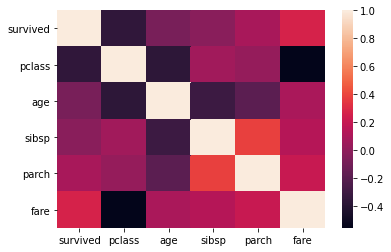

In [8]:
sns.heatmap(data=result) # 상관관계 확인
plt.show()

In [9]:
# survived와 pclass의 피어슨 상관분석하고 검정결과 해석
import scipy.stats as stats

# 피어슨 상관계수 검정
corr = stats.pearsonr(titanic.survived, titanic.pclass)
corr #(상관계수, p-value)
# (-0.35965268208684575, 3.1621035416647744e-23)

(-0.3596526820868455, 3.1621035416647744e-23)

# PCA : 주성분분석

### 고차원의 데이터를 저차원의 데이터로 환원시키는 기법
### 데이터를 어떤 기준을 바탕으로 변환을 하고, 그 변환으로 인해 '주성분'이 추출된다.
### 추출된 주성분은 원래 가지고 있는 데이터와 다르며 변환된 데이터이다.
### 변수의 의미가 중요한 경우에는 PCA를 사용하면 안 된다. PCA는 데이터에 변환을 가하는 것이기 때문이다.
### PCA의 본질은 차원 축소이며 차원이 축소됐다는 것은 원본 데이터가 아니라 변환(projection)된 데이터, 즉 주성분을 이용해 분석 혹은 모델링을 진행하겠다는 것이다.

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df.drop(['target'], axis=1).values # 독립변인들의 value값만 추출
y = df['target'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
PC_score = pca.transform(x)
# pca의 eigen_vector
pca.components_

In [ ]:
pca.explained_variance_ #explained_variacne를 통해서 PC값의 설명력을 확인 할 수 있다.

In [ ]:
ratio = pca.explained_variance_ratio_ #explained_variance 비율로 확인
ratio

In [ ]:
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4'], columns=['pc_ratio'])
df_v.plot.pie(y='pc_ratio')
df_v

In [ ]:
ax = plt.plot( ['PC1','PC2','PC3','PC4'], ratio)
plt.ylabel('Variance(%)')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

In [ ]:
ax = plt.bar(x = range(len(ratio)), height=ratio, tick_label=['PC1','PC2','PC3','PC4'])
plt.ylabel('Variance(%)')
plt.xlabel('Principal Component')
plt.title('PCA Plot(bar)')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2) # 주성분의 개수 결정
pc = pca.fit_transform(x)
pc_y = np.c_[pc,y]
principalDf = pd.DataFrame(pc_y, columns = ['pc1', 'pc2','diagnosis'])
principalDf

In [ ]:
import seaborn as sns
sns.scatterplot(data=principalDf,x='pc1',y='pc2',hue='diagnosis')

In [ ]:
# 로지스틱 분석
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf2 = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf2.fit(pc,y)
pred = clf2.predict(pc) #PC_score[:,:2]
confusion_matrix(y,pred)

# 자동차 연비 예측 회귀분석 예제(1)

In [ ]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

## 1) 데이터 수집

In [ ]:
import numpy as np
import pandas as pd 

data_df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
data_df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model_year','origin','car_name'] 


## 2) 데이터 준비 및 탐색

In [ ]:
print(' 데이터셋 크기 : ', data_df.shape)

data_df.head()

#### - 분석하지 않을 변수 제외하기

In [ ]:
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)

In [ ]:
print(' 데이터세트 크기 : ', data_df.shape)

data_df.head()

In [ ]:
data_df.info()

## 3) 분석 모델 구축

In [ ]:
# X, Y 분할하기

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [ ]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

In [ ]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

## 4) 결과 분석 및 시각화

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

In [ ]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

In [ ]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

### - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

###   <<<< 연비 예측하기  >>>>

In [ ]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

In [ ]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1 , model_year_1]])

In [ ]:
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)

## 주택가격 회귀 분석 회귀분석 예제(2)

In [ ]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

## 1) 데이터 수집

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
boston =  load_boston()

## 2) 데이터 준비 및 탐색

In [ ]:
print(boston.DESCR)

In [ ]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

In [ ]:
boston_df['PRICE'] = boston.target
boston_df.head()

In [ ]:
print('보스톤 주택 가격 데이터셋 크기 : ', boston_df.shape)

In [ ]:
boston_df.info()

## 3) 분석 모델 구축

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# X, Y 분할하기
Y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1, inplace=False)

In [ ]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [ ]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [ ]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

In [ ]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

## 4) 결과 분석 및 시각화

In [ ]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

In [ ]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

In [ ]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending = False)

## - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

## 로지스틱 회귀 분석을 이용한 유방암 진단 프로젝트 

### 1) 데이터 수집

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

In [ ]:
b_cancer = load_breast_cancer()

### 2) 데이터 수집 및 탐색

In [ ]:
print(b_cancer.DESCR)

In [ ]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)

In [ ]:
b_cancer_df['diagnosis']= b_cancer.target

In [ ]:
b_cancer_df.head()

In [ ]:
print('유방암 진단 데이터셋 크기 : ', b_cancer_df.shape)

In [ ]:
b_cancer_df.info()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

In [ ]:
print(b_cancer.data[0])

In [ ]:
print(b_cancer_scaled[0])

### 3) 분석 모델 구축 : 로지스틱 회귀를 이용한 이진 분류 모델

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# X, Y 설정하기
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled 

In [ ]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
# 로지스틱 회귀 분석 : (1)모델 생성
lr_b_cancer = LogisticRegression() # multi_class : {'auto', 'ovr', 'multinomial'}, default='auto'

In [ ]:
# 로지스틱 회귀 분석 : (2)모델 훈련
lr_b_cancer.fit(X_train, Y_train)

In [ ]:
# 로지스틱 회귀 분석 : (3)평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr_b_cancer.predict(X_test)

### 4) 결과 분석 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# 오차 행렬 
confusion_matrix(Y_test, Y_predict)

In [ ]:
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

In [ ]:
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

# <span style="color:red">데이터 전처리</span>

- 어떤 입력을 가지냐에 따라 결과도 달라질 수 있어 전처리는 중요한 단계

- 결손값이 있으면 대체값으로 치환

1) 평균값 

2) null 값이 대부분이라면 drop

- 문자열로 된 필드는 사이킷 런에서 입력값으로 허용하지 않으므로 숫자로 변경이 필요. (데이터 인코딩)

1) 식별자 필드는 숫자로 변경하는 것 보다 제거하는게 낫다 (식별의 용도로 사용하고 분석에는 의미 없는값으로 예측 성능을 떨어트린다.)

- 전처리 종류


## [ 전처리 종류 ]

### <span style="color:blue">데이터 인코딩</span>
### 레이블 인코딩 
##### 예) TV: 1 , 냉장고 : 2 , 전자레인지 : 3
##### * 주의점 : 01, 02 는 문자열이지 숫자가 아님.

- 숫자는 클수록 영향도가 크므로 인코딩된 값에 따라 성능이 바뀌어 선형회귀에서는 사용하면 안됨. 해당 

- 트리 계열 ML 알고리즘은 숫자의 이런 특성을 반영하지 않아 가능함

### 원-핫 인코딩
#### 예) tv, 냉장고, 전자레인지

- 해당 하는 값에만 1을 주고 나머지는 0으로 표기하는 기법 (숫자의 값이 클수록 가중치가 부여되는 이슈 보안)

- sklearn or pandas 이용


### <span style="color:blue">스케일링</span>
### StandardScaler 
#### StandardScaler는 평균은 0에 가까운값, 분산은 1에 가까운 가우시안 정규 분포를 가진 값으로 변경

### MinMaxScaler 
#### MinMaxScaler는 데이터를 0과 1사이 값으로 변환 (음수가 있다면 -1 ~ 1값으로 변경)

##### 스케일링 유의 사항 - fit : 스케일링을 위한 기준 설정

- transform : 변환

- 잘못된 예) train data를 fit, transform  진행 후,
test data fit, transform 진행 하면 각각 스케일링 기준이 달라져서 정확한 예측이 불가능함.

-  올바른 예) train data 를 fit, transform 진행 후, test data transform 진행

In [ ]:
from sklearn.preprocessing import LabelEncoder 
items = ['TV', '냉장고', '전자레인지']
encoder = LabelEncoder() 
#encoder.fit(items) 
#labels = encoder.transform(items) 
encoder = LabelEncoder() 
encoder.fit(items) 
labels = encoder.transform(items) 
print('인코딩 값 : {}'.format(labels)) 
print('인코딩 클래스 : {}'.format(encoder.classes_)) 
print('인코딩 값을 거꾸로 뒤집어서 디코드 : {}'.format(encoder.inverse_transform(list(reversed(labels))))) # 인코딩 값 : [0 1 2] # 인코딩 클래스 : ['TV' '냉장고' '전자레인지'] # 인코딩 값을 거꾸로 뒤집어서 디코드 : ['전자레인지' '냉장고' 'TV']


In [ ]:
from sklearn.preprocessing import OneHotEncoder 
items = ['TV', '냉장고', '전자레인지','TV'] # 라벨 인코딩으로 숫자로 변환 후 1차원 > 2차원 변경 
encoder = LabelEncoder() 
encoder.fit(items) 
labels = encoder.transform(items) 
print('데이터 차원\n{0} \n라벨 인코딩 데이터\n{1}'.format(labels.shape,labels)) 
labels = labels.reshape(-1,1) 
print('------------') 
print('데이터 차원\n{0} \n2차원으로 변형된 데이터\n{1}'.format(labels.shape,labels))
oh_encoder = OneHotEncoder() 
oh_encoder.fit(labels) 
oh_labels = oh_encoder.transform(labels) 
print('원-핫 인코딩 데이터\n{0}'.format(oh_labels.toarray())) 
print('원-핫 인코딩 데이터 차원\n{0}'.format(oh_labels.shape))


In [ ]:
import pandas as pd 
df = pd.DataFrame({'item':items}) 
print(df)
pd.get_dummies(df)

* StandardScaler

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())


In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

* MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())


* Scaler를 이용하여 학습 데이터와 테스트 데이터에 fit(), transform(), fit_transform() 적용 시 유의사항. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [ ]:
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()
# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(train_array)
# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)
 
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

In [ ]:
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최소값이 0, 최대값이 5으로 설정됨 
scaler.fit(test_array)
# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.  
test_scaled = scaler.transform(test_array)
# train_array 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))
